In [1]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from fromscratchtoml.toolbox import binary_visualize
from fromscratchtoml.cluster import KMeans as fs2ml_KMeans

%matplotlib inline

In [2]:
random_state = 170
np.random.seed(random_state)
n_clusters = 3
n_samples = 1500

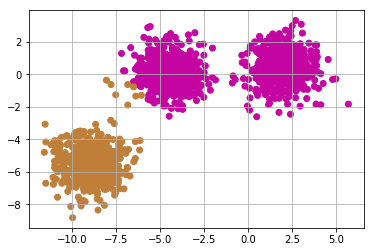

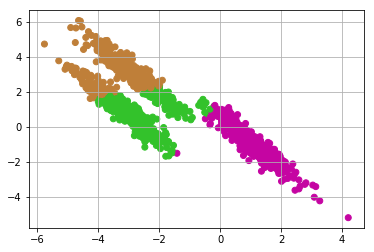

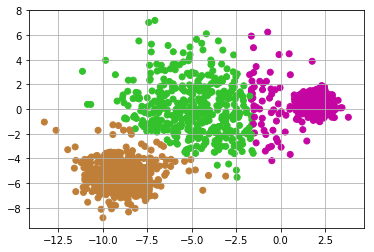

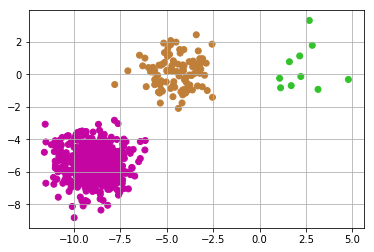

In [3]:
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

binary_visualize(X, y_pred)


transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

binary_visualize(X_aniso, y_pred)


X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

binary_visualize(X_varied, y_pred)




X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

binary_visualize(X_filtered, y_pred)


In [4]:
km = fs2ml_KMeans(n_clusters=3)
km.fit(X)

KMeans({'max_iter': 500, 'n_clusters': 3})

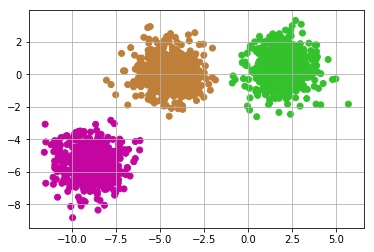

In [5]:
binary_visualize(X, km.labels)

In [6]:
km = fs2ml_KMeans(n_clusters=100)
km.fit(X)

KMeans({'max_iter': 500, 'n_clusters': 100})

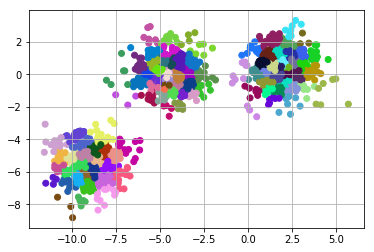

In [7]:
binary_visualize(X, km.labels)